# Gradiant Boosting walkthrough


SK-Learn Documentation: https://scikit-learn.org/dev/modules/tree.html

Repeats the Boston Housing, but computes the full decision tree.  The last portion shows an example of manually creating the boosting trees.


In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pydot
from IPython.display import Image

import pandas_profiling

from sklearn.model_selection import train_test_split, cross_val_score
from six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

#  Regression Tree

Housing values in the Boston suburbs.  This data set contains 506 rows and 14 columns/variables:

Variable | Description
----------- | ---------
crim | per capita crime rate by town.
zn | proportion of residential land zoned for lots over 25,000 sq.ft.
indus | proportion of non-retail business acres per town.
chas | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
nox| nitrogen oxides concentration (parts per 10 million).
rm | average number of rooms per dwelling.
age | proportion of owner-occupied units built prior to 1940.
dis | weighted mean of distances to five Boston employment centres.
rad | index of accessibility to radial highways.
tax | full-value property-tax rate per \$10,000.
ptratio | pupil-teacher ratio by town.
black | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
lstat | lower status of the population (percent).
medv | median value of owner-occupied homes in \$1000s.

Data Source: https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/Boston.html

Predict housing values

In [3]:
# Tests to see if we are running in the Google Colaboratory environment
# If so, use an https URL to access the data.  Otherwise, load via the file path
try:
  import google.colab
  data_file_prefix = "https://raw.githubusercontent.com/slankas/DataScienceNotebooks/master/ModelingPart2/"
  import plotly.io as pio
  pio.renderers.default = 'colab'
except:
  data_file_prefix = ""

In [4]:
boston_df = pd.read_csv(data_file_prefix + 'data/Boston.csv')
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
#boston_df.profile_report(style={'full_width':True})

In [6]:
X = boston_df.drop('medv', axis=1)
y = boston_df.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [7]:
dtr1 = DecisionTreeRegressor(random_state=42)
dtr1.fit(X_train, y_train)
pred = dtr1.predict(X_test)

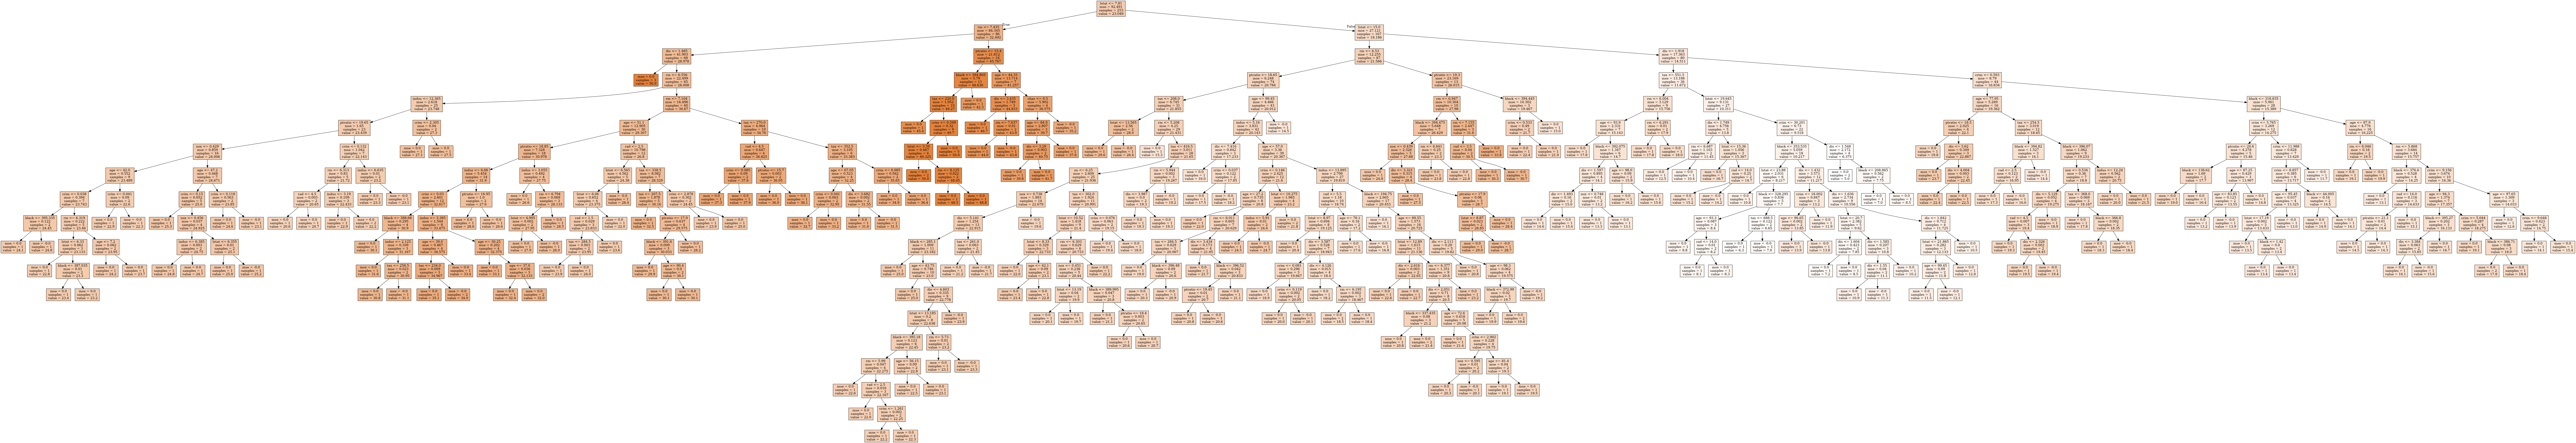

In [8]:
graph, = print_tree(dtr1, features=X.columns)
Image(graph.create_png())

Text(0, 0.5, 'y_test')

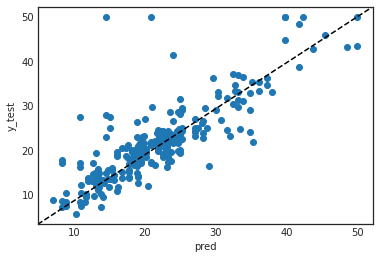

In [9]:
plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [10]:
mean_squared_error(y_test, pred)

25.04683794466403

In [11]:
list(X_train.columns)

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat']

# Alternative Decision Tree view
Optional, alternate view of decision tree viewing: https://github.com/parrt/dtreeviz

Note: this block does not execute on Google Colab

In [12]:
from dtreeviz.trees import dtreeviz

# On windows subsystem for linux, dtreeviz, requires installing wsl-open (https://github.com/4U6U57/wsl-open) and associating SVG files with it.

viz = dtreeviz(dtr1, X_train, y_train, target_name='PRICE',
               feature_names=list(X_train.columns))
viz.save("boston.svg") # suffix determines the generated image format
viz.view()             # pop up window to display image

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


# Now, let's utilize a random forest

In [13]:
# There are 13 features in the dataset
X.shape

(506, 13)

In [14]:
rfr = RandomForestRegressor(max_features=13, random_state=1)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_features=13, random_state=1)

Text(0, 0.5, 'y_test')

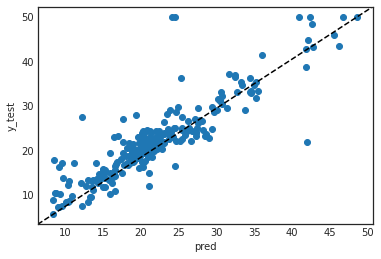

In [15]:
pred = rfr.predict(X_test)

plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [16]:
mean_squared_error(y_test, pred)

16.17512869960475

In [17]:
# Random forests: using 6 features
rfr2 = RandomForestRegressor(max_features=6, random_state=1)
rfr2.fit(X_train, y_train)

RandomForestRegressor(max_features=6, random_state=1)

In [18]:
pred = rfr2.predict(X_test)
mean_squared_error(y_test, pred)

15.82350045849802

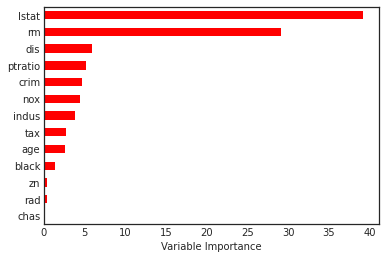

In [19]:
Importance = pd.DataFrame({'Importance':rfr2.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# now gradiant boosting

In [20]:
gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=1)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, random_state=1)

zn          0.013059
chas        0.121257
rad         0.153199
black       0.460309
indus       0.576559
nox         0.731767
age         0.922677
tax         1.098078
crim        2.799589
ptratio     4.370389
dis         5.896297
rm         27.934202
lstat      54.922618
dtype: float64


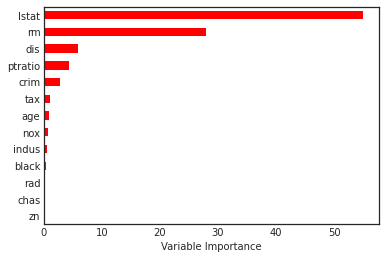

In [21]:
feature_importance = gbr.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [22]:
mean_squared_error(y_test, gbr.predict(X_test))

15.592155779633027

In [23]:
def generateBoostingTrees(X,y, numTrees=1000, random_state=42, max_depth=6):
    trees = []
    rootDT = DecisionTreeRegressor(random_state=random_state,max_depth=max_depth)
    rootDT.fit(X,y)
    yHat = rootDT.predict(X)
    e = y - yHat
    trees.append(rootDT)

    for i in range(1,numTrees):
        dtX = DecisionTreeRegressor(random_state=random_state,max_depth=max_depth)
        dtX.fit(X,e)
        eNew = dtX.predict(X)
        yHat = eNew + yHat
        e = y - yHat
        mse = mean_squared_error(y,yHat)
        trees.append(dtX)
        print ("%3d: MSE: %2.8f" % (i,mse))
        if (mse < 0.0000001):
            break
        
    return trees

In [24]:
trees = generateBoostingTrees(X_train,y_train,400,10)

  1: MSE: 1.75456929
  2: MSE: 1.01525489
  3: MSE: 0.29086825
  4: MSE: 0.13306318
  5: MSE: 0.07767699
  6: MSE: 0.05144483
  7: MSE: 0.02823095
  8: MSE: 0.01552907
  9: MSE: 0.00849206
 10: MSE: 0.00243140
 11: MSE: 0.00117072
 12: MSE: 0.00085110
 13: MSE: 0.00017784
 14: MSE: 0.00009399
 15: MSE: 0.00004081
 16: MSE: 0.00002096
 17: MSE: 0.00001210
 18: MSE: 0.00000669
 19: MSE: 0.00000510
 20: MSE: 0.00000188
 21: MSE: 0.00000091
 22: MSE: 0.00000063
 23: MSE: 0.00000037
 24: MSE: 0.00000022
 25: MSE: 0.00000018
 26: MSE: 0.00000017
 27: MSE: 0.00000005


In [25]:
def computeRegression(dTrees, X):
    pred = dTrees[0].predict(X)
    for i in range(1,len(dTrees)):
        pred = pred + dTrees[i].predict(X) *.01
    return pred

In [26]:
print(len(trees))
predR = computeRegression(trees,X_test)
mean_squared_error(y_test,predR)

28


23.841874203711257